In [1]:
import pandas as pd

# Load the CSV files into DataFrames
df_final_output = pd.read_csv('output_with_classifications_regex.csv')
df_selected_columns_output = pd.read_csv('classificationLLM.csv')

# Merge the DataFrames on the 'text_clean' column
df_merged = pd.merge(df_final_output, df_selected_columns_output, on='text_clean', suffixes=('_final', '_selected'))

# Calculate the agreement or similarity rate
# Here, we're checking how many rows have the same value in 'test_debt_type_numeric' and 'classification_numeric'
agreement_rate = (df_merged['test_debt_type_numeric'] == df_merged['classification_numeric']).mean()

print(f'Agreement Rate: {agreement_rate:.2%}')


Agreement Rate: 6.68%


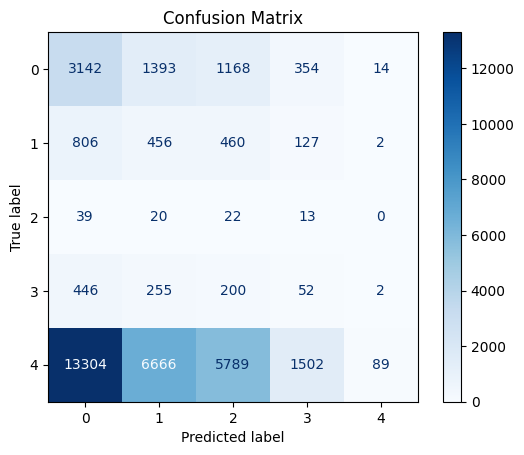

In [5]:
df_merged = pd.merge(df_final_output, df_selected_columns_output, on='text_clean', suffixes=('_final', '_selected'))

# Generate the confusion matrix
cm = confusion_matrix(df_merged['test_debt_type_numeric'], df_merged['classification_numeric'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()